In [1]:
import os
from os.path import join
import sys
sys.path.append("../")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import random
import SimpleITK as sitk


from exploratoryAnalysis.DataAnalyzer import DataAnalyzer
from time import perf_counter

DATA_ROOT = "/home/guest/code/data_jsons"
analyzer = DataAnalyzer(DATA_ROOT)


In [3]:
import concurrent.futures
from concurrent.futures import ProcessPoolExecutor
import json


start = perf_counter()

with open(join(DATA_ROOT, "all_data.json")) as f:
    all_data = json.load(f)


max_workers = analyzer.cpus

with concurrent.futures.ProcessPoolExecutor(
    max_workers=max_workers
) as executor:
    records = list(
        executor.map(analyzer.parse_metadata_file, all_data["images"])
    )
df = pd.DataFrame(records)

print(df)
print(perf_counter() - start, "seconds")

Error decoding line in /media/guest/PORT-DISK/Datasets/nnUNet_raw/Dataset001_picai/imagesTr/picai_0000_0000.nii.gz: b'\x1f\x8b\x08\x00\x00\x00\x00\x00\x00\x03\xc4\x9by0\x15'...Error decoding line in /media/guest/PORT-DISK/Datasets/nnUNet_raw/Dataset001_picai/imagesTr/picai_0008_0000.nii.gz: b'\x1f\x8b\x08\x00\x00\x00\x00\x00\x00\x03\xc4\x99g4\xd6'...

Error decoding line in /media/guest/PORT-DISK/Datasets/nnUNet_raw/Dataset001_picai/imagesTr/picai_0006_0000.nii.gz: b'\x1f\x8b\x08\x00\x00\x00\x00\x00\x00\x03\xc4\x9ai4\x15'...
Error decoding line in /media/guest/PORT-DISK/Datasets/nnUNet_raw/Dataset001_picai/imagesTr/picai_0009_0000.nii.gz: b'\x1f\x8b\x08\x00\x00\x00\x00\x00\x00\x03\xc4\xbbi4\xd5'...
Error decoding line in /media/guest/PORT-DISK/Datasets/nnUNet_raw/Dataset001_picai/imagesTr/picai_0005_0000.nii.gz: b'\x1f\x8b\x08\x00\x00\x00\x00\x00\x00\x03\xc4\xbai4\xd6'...
Error decoding line in /media/guest/PORT-DISK/Datasets/nnUNet_raw/Dataset001_picai/imagesTr/picai_0003_0000.nii.gz:

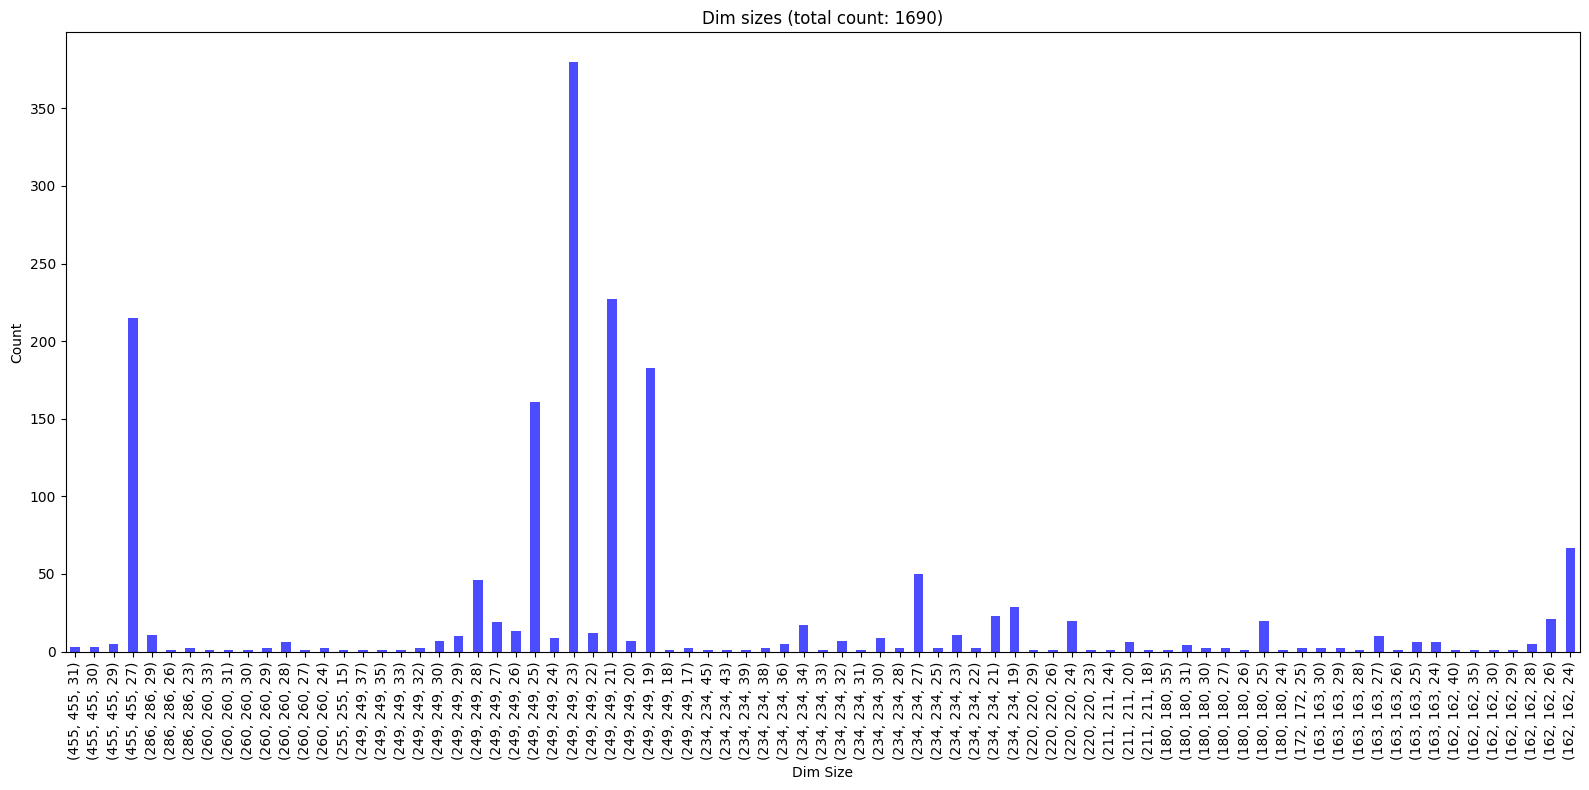

Dim size counts:
Dim size (455, 455, 31): 3 (0.18%)
Dim size (455, 455, 30): 3 (0.18%)
Dim size (455, 455, 29): 5 (0.30%)
Dim size (455, 455, 27): 215 (12.72%)
Dim size (286, 286, 29): 11 (0.65%)
Dim size (286, 286, 26): 1 (0.06%)
Dim size (286, 286, 23): 2 (0.12%)
Dim size (260, 260, 33): 1 (0.06%)
Dim size (260, 260, 31): 1 (0.06%)
Dim size (260, 260, 30): 1 (0.06%)
Dim size (260, 260, 29): 2 (0.12%)
Dim size (260, 260, 28): 6 (0.36%)
Dim size (260, 260, 27): 1 (0.06%)
Dim size (260, 260, 24): 2 (0.12%)
Dim size (255, 255, 15): 1 (0.06%)
Dim size (249, 249, 37): 1 (0.06%)
Dim size (249, 249, 35): 1 (0.06%)
Dim size (249, 249, 33): 1 (0.06%)
Dim size (249, 249, 32): 2 (0.12%)
Dim size (249, 249, 30): 7 (0.41%)
Dim size (249, 249, 29): 10 (0.59%)
Dim size (249, 249, 28): 46 (2.72%)
Dim size (249, 249, 27): 19 (1.12%)
Dim size (249, 249, 26): 13 (0.77%)
Dim size (249, 249, 25): 161 (9.53%)
Dim size (249, 249, 24): 9 (0.53%)
Dim size (249, 249, 23): 380 (22.49%)
Dim size (249, 249, 22): 

In [16]:
# Obtener el conteo de dim_size y ordenarlo
dim_sizes = df['dim_size'].value_counts().sort_index(ascending=False)

# Agrupar por resolución (ancho, alto) ignorando la profundidad
resolution_counts = (
    df['dim_size']
    .apply(lambda x: (x[0], x[1]))  # Extraer solo (ancho, alto)
    .value_counts()
    .sort_index(ascending=False)
)

# Crear dos gráficos separados con mayor ancho
fig1, ax1 = plt.subplots(figsize=(16, 8))  # Gráfico más ancho para dim_size

# Primer gráfico: dim_size
dim_sizes.plot(kind='bar', ax=ax1, color='blue', alpha=0.7)
ax1.set_title(f"Dim sizes (total count: {dim_sizes.sum()})")
ax1.set_xlabel("Dim Size")
ax1.set_ylabel("Count")
ax1.tick_params(axis='x', rotation=90)

plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()


# print counts of unique values and the perentage they represent, for dim sizes
print("Dim size counts:")
for dim, count in dim_sizes.items():
    percentage = (count / dim_sizes.sum()) * 100
    print(f"Dim size {dim}: {count} ({percentage:.2f}%)")


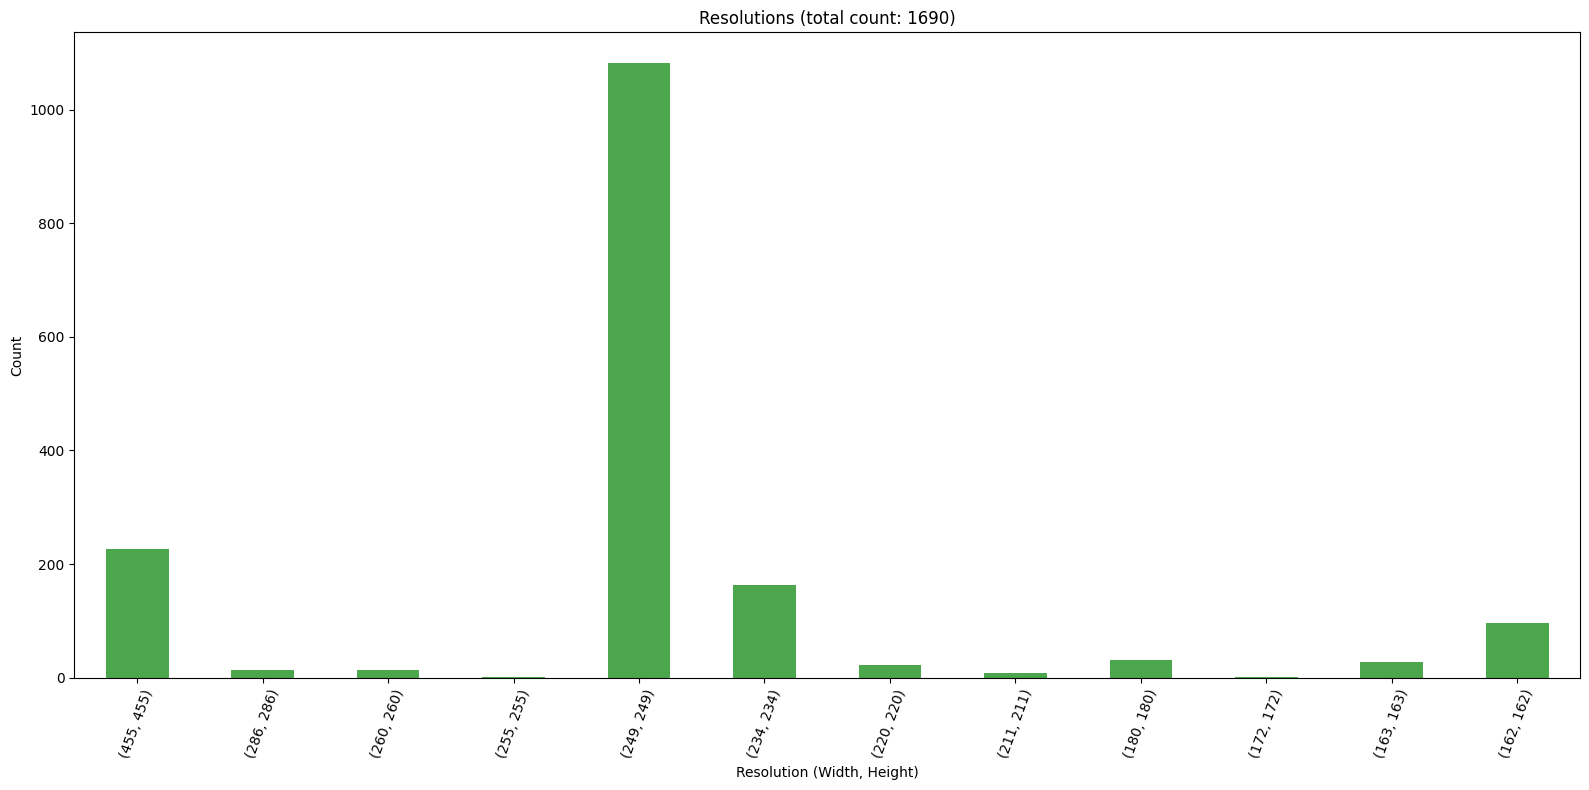

Resolution counts:
Resolution (455, 455): 226 (13.37%)
Resolution (286, 286): 14 (0.83%)
Resolution (260, 260): 14 (0.83%)
Resolution (255, 255): 1 (0.06%)
Resolution (249, 249): 1082 (64.02%)
Resolution (234, 234): 164 (9.70%)
Resolution (220, 220): 23 (1.36%)
Resolution (211, 211): 8 (0.47%)
Resolution (180, 180): 31 (1.83%)
Resolution (172, 172): 2 (0.12%)
Resolution (163, 163): 28 (1.66%)
Resolution (162, 162): 97 (5.74%)


In [17]:
fig2, ax2 = plt.subplots(figsize=(16, 8))  # Gráfico más ancho para resolución (ancho, alto)

# Segundo gráfico: resolución (ancho, alto)
resolution_counts.plot(kind='bar', ax=ax2, color='green', alpha=0.7)
ax2.set_title(f"Resolutions (total count: {resolution_counts.sum()})")
ax2.set_xlabel("Resolution (Width, Height)")
ax2.set_ylabel("Count")
ax2.tick_params(axis='x', rotation=70)

plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()


# print counts of unique values and the perentage they represent, for resolutions
print("Resolution counts:")
for res, count in resolution_counts.items():
    percentage = (count / resolution_counts.sum()) * 100
    print(f"Resolution {res}: {count} ({percentage:.2f}%)")


# print counts of unique values and the perentage they represent, for depths


In [ ]:

# another one, just for the depths
depth_counts = df['dim_size'].apply(lambda x: x[2]).value_counts().sort_index(ascending=False)
fig3, ax3 = plt.subplots(figsize=(16, 8))  # Gráfico más ancho para profundidades
depth_counts.plot(kind='bar', ax=ax3, color='orange', alpha=0.7)
ax3.set_title(f"Depths (total count: {depth_counts.sum()})")
ax3.set_xlabel("Depth")
ax3.set_ylabel("Count")
ax3.tick_params(axis='x', rotation=90)
plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()

print("Depth counts:")
for depth, count in depth_counts.items():
    percentage = (count / depth_counts.sum()) * 100
    print(f"Depth {depth}: {count} ({percentage:.2f}%)")

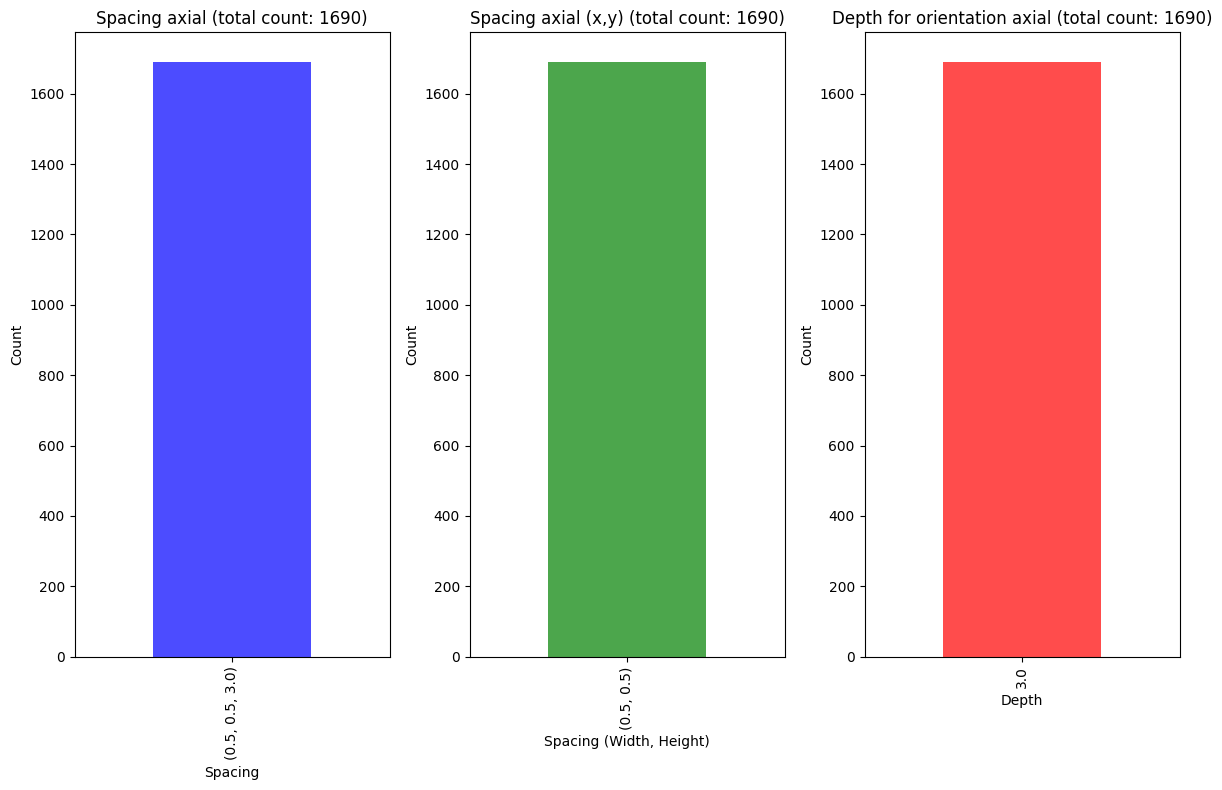

In [10]:
value = "axial"
    
dim_sizes = df['spacing'].value_counts().sort_index(ascending=False)

# Agrupar por resolución (ancho, alto) ignorando la profundidad
resolution_counts = (
    df['spacing']
    .apply(lambda x: (x[0], x[1]))  # Extraer solo (ancho, alto)
    .value_counts()
    .sort_index(ascending=False)
)

# agrupar por la profundidad de la imagen
depth_counts = (
    df['spacing']
    .apply(lambda x: (x[2]))  # Extraer solo la profundidad
    .value_counts()
    .sort_index(ascending=False)
)


# Crear dos gráficos separados
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))  # Dos gráficos lado a lado

# Primer gráfico: dim_size
dim_sizes.plot(kind='bar', ax=ax1, color='blue', alpha=0.7)
ax1.set_title(f"Spacing {value} (total count: {dim_sizes.sum()})")
ax1.set_xlabel("Spacing")
ax1.set_ylabel("Count")
ax1.tick_params(axis='x', rotation=90)

# Segundo gráfico: resolución (ancho, alto)
resolution_counts.plot(kind='bar', ax=ax2, color='green', alpha=0.7)
ax2.set_title(f"Spacing {value} (x,y) (total count: {resolution_counts.sum()})")
ax2.set_xlabel("Spacing (Width, Height)")
ax2.set_ylabel("Count")
ax2.tick_params(axis='x', rotation=90)

# Tercer gráfico: profundidad
depth_counts.plot(kind='bar', ax=ax3, color='red', alpha=0.7)
ax3.set_title(f"Depth for orientation {value} (total count: {depth_counts.sum()})")
ax3.set_xlabel("Depth")
ax3.set_ylabel("Count")
ax3.tick_params(axis='x', rotation=90)

plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()

In [41]:
import ipywidgets as widgets
from ipywidgets import interact
import SimpleITK as sitk

random_image = random.choice(range(0, len(all_data["images"])))
# Load the image using SimpleITK
image = sitk.ReadImage(all_data["images"][random_image])
image_array = sitk.GetArrayFromImage(image)  # Convert to numpy array
num_slices = image_array.shape[0]  # Number of slices in the image

# Load the corresponding label using SimpleITK
label = sitk.ReadImage(all_data["labels"][random_image])
label_array = sitk.GetArrayFromImage(label)  # Convert to numpy array

# Create an IntSlider widget
slider = widgets.IntSlider(min=0, max=num_slices - 1, step=1, description="Slice Index")

# Function to display a specific slice with the label overlay
def display_slice_with_label(slice_index):
    plt.figure(figsize=(6, 6))
    plt.imshow(image_array[slice_index], cmap="gray", alpha=1)
    plt.imshow(label_array[slice_index], cmap="jet", alpha=0.3)  # Overlay label with transparency
    plt.title(f"Slice {slice_index}")
    plt.axis("off")
    plt.show()

# Use interact to link the slider with the display function
interact(display_slice_with_label, slice_index=slider)


interactive(children=(IntSlider(value=0, description='Slice Index', max=20), Output()), _dom_classes=('widget-…

<function __main__.display_slice_with_label(slice_index)>